<a href="https://colab.research.google.com/github/reseach/END3.0/blob/main/END3_0_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Given Code***

> Code Provided as Part of END 3 Assignment 1

Objectives: Neural Network that learns the XOR Functionality

Assignment 

*   remove the last activation function

*   make sure there are in total 44 parameters

*   run it for 2001 epochs


In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [2]:
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1,1)

In [3]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2)
        self.lin2 = nn.Linear(2, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.tanh(x)
        x = self.lin2(x)
        x = F.tanh(x)
        return x

In [4]:
model = XOR()
print(model)
from torchsummary import summary
summary(model, (2,2))

XOR(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (lin2): Linear(in_features=2, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 2]               6
            Linear-2                 [-1, 2, 1]               3
Total params: 9
Trainable params: 9
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [5]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [6]:
loss_func = nn.L1Loss()

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)


In [8]:
epochs = 300
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0:
        print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.5447674989700317, 
Epoch: 50, Loss: 0.335031121969223, 


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 100, Loss: 0.3914981484413147, 
Epoch: 150, Loss: 0.00406491756439209, 
Epoch: 200, Loss: 0.010968208312988281, 
Epoch: 250, Loss: 0.35746943950653076, 


Assignment

Steps 

1. Removed tanh activation function from the forward() method
2. Made a network with 44 parameters as weights using 'x' linear layers
3. Run for 2001 epoch

In [9]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
%matplotlib inline
torch.manual_seed(2)

In [17]:
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1,1)

# ***Network Architecture for 44 parameters***



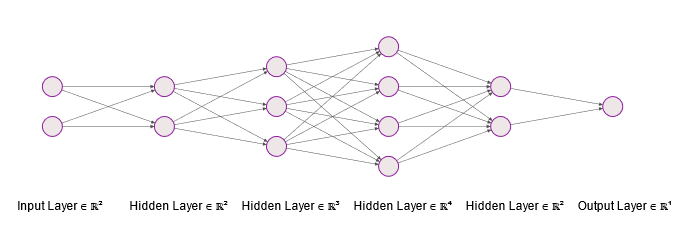

In [18]:
class XOR(nn.Module):
  def __init__(self, input_dim = 2, output_dim = 1):
    super(XOR, self).__init__()
    self.lin1 = nn.Linear(input_dim, 2)
    self.lin2 = nn.Linear(2, 3)
    self.lin3 = nn.Linear(3, 4)
    self.lin4 = nn.Linear(4, 2)
    self.lin5 = nn.Linear(2, output_dim)

  def forward(self, x):
    x = self.lin1(x)
    x = F.tanh(x)
    x = self.lin2(x)
    x = F.tanh(x)
    x = self.lin3(x)
    x = F.tanh(x)
    x = self.lin4(x)
    x = F.tanh(x)
    x = self.lin5(x)  # ACtivation Function/tanh is not used at the last layer(5) as required in the assignment
    return x



In [19]:
model = XOR()
print(model)
from torchsummary import summary
summary(model, (2, 2))

XOR(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (lin2): Linear(in_features=2, out_features=3, bias=True)
  (lin3): Linear(in_features=3, out_features=4, bias=True)
  (lin4): Linear(in_features=4, out_features=2, bias=True)
  (lin5): Linear(in_features=2, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 2]               6
            Linear-2                 [-1, 2, 3]               9
            Linear-3                 [-1, 2, 4]              16
            Linear-4                 [-1, 2, 2]              10
            Linear-5                 [-1, 2, 1]               3
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
-------

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [20]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)


In [21]:
loss_func = nn.L1Loss()

In [22]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

In [26]:
epochs = 2001 # Running the code for 2001 epochs as desired in the assignment
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0:
        print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0, Loss: 0.11470368504524231, 
Epoch: 50, Loss: 0.031381070613861084, 
Epoch: 100, Loss: 0.020070761442184448, 
Epoch: 150, Loss: 0.13024044036865234, 
Epoch: 200, Loss: 0.10365724563598633, 
Epoch: 250, Loss: 0.09543514251708984, 
Epoch: 300, Loss: 0.1347332000732422, 
Epoch: 350, Loss: 0.400480180978775, 
Epoch: 400, Loss: 0.03986746072769165, 
Epoch: 450, Loss: 0.18604618310928345, 
Epoch: 500, Loss: 0.04896101355552673, 
Epoch: 550, Loss: 0.2887918949127197, 
Epoch: 600, Loss: 0.12254416942596436, 
Epoch: 650, Loss: 0.3349461555480957, 
Epoch: 700, Loss: 0.003617703914642334, 
Epoch: 750, Loss: 0.24065271019935608, 
Epoch: 800, Loss: 0.05944645404815674, 
Epoch: 850, Loss: 0.04011380672454834, 
Epoch: 900, Loss: 0.07260358333587646, 
Epoch: 950, Loss: 0.3131037950515747, 
Epoch: 1000, Loss: 0.03624281287193298, 
Epoch: 1050, Loss: 0.13674280047416687, 
Epoch: 1100, Loss: 0.08227372169494629, 
Epoch: 1150, Loss: 0.11467450857162476, 
Epoch: 1200, Loss: 0.020619213581085205, 
